# Show me the money!💸
# ¡Enseñame la Pasta!💸
## La Batalla Analítica bancaria 💸📊

### Overview
¡Prepárate para sumergirte en el fascinante mundo de los préstamos bancarios con un grito audaz: "¡Enseñame la Pasta!" Esta competición desafiará tus habilidades analíticas mientras te sumerges en conjuntos de datos intrigantes y navegas por las olas financieras.

💡 Desafío Analítico: Tu misión es desentrañar los secretos detrás de cada solicitud de préstamo. Descubre patrones, identifica oportunidades y muestra al mundo que tienes lo necesario para destacar en la batalla analítica.

🏁 Carrera hacia la Precisión: Enfréntate a la competencia y demuestra que tu modelo puede superar las decisiones humanas. ¿Puedes prever quién merece un préstamo y quién no🤷‍♂️? ¡La carrera hacia la precisión está en marcha!

¡Mucha suerte en la batalla! 🦾

### Description
Tal y como sucede en otras competiciones de Kaggle, deberéis centraros en disponer un buen modelo basado en el conjunto de datos de entrenamiento (train.csv) y ver si gracias al buen trabajo realizado obtenéis una buena predicción sobre el conjunto de evaluación (test.csv). No dispondréis de las clasificaciones asociadas al conjunto de set con lo que hasta no subir vuestros datos a la plataforma no sabréis cómo de bueno es vuestro modelo en realidad.

### Evaluation
En esta competición, evaluaremos la eficacia de los modelos utilizando la métrica Area Under Curve (AUC). Esta métrica proporciona una medida de la capacidad del modelo para discriminar entre clases, siendo especialmente relevante en problemas de clasificación binaria.

Para obtener más detalles sobre la interpretación y aplicación de AUC, te recomendamos explorar el siguiente enlace: Understanding AUC-ROC Curve. Este recurso proporcionará una comprensión más profunda de cómo se utiliza AUC para evaluar y comparar el rendimiento de los modelos en esta competición. ¡Explora y prepárate para destacar en la puntuación AUC! 📊🎯

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

### DATASETS

In [197]:
dtr = pd.read_csv('./data/train.csv')
dte = pd.read_csv('./data/test.csv')


In [198]:
dtr.head()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,NaN,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0


In [199]:
dtr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [200]:
dtr.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.416400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102236.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.703641e+03,8.459952,0.254619,1.019010,0.228762,0.757933,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.622288e+04,5.134329,4.032506,1.131065,4.017864,1.115273,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


### DATA CLEANING

In [201]:
dtr.isnull().sum()

ID                                          0
RevolvingUtilizationOfUnsecuredLines        0
Age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20836
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2764
SeriousDlqin2yrs                            0
dtype: int64

In [202]:
# median_values = dtr.median()
# dtr = dtr.fillna(median_values)

dtr.dropna(inplace=True)


In [203]:
dtr.isnull().sum()

ID                                      0
RevolvingUtilizationOfUnsecuredLines    0
Age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
SeriousDlqin2yrs                        0
dtype: int64

In [204]:
dtr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84164 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    84164 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  84164 non-null  float64
 2   Age                                   84164 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  84164 non-null  int64  
 4   DebtRatio                             84164 non-null  float64
 5   MonthlyIncome                         84164 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       84164 non-null  int64  
 7   NumberOfTimes90DaysLate               84164 non-null  int64  
 8   NumberRealEstateLoansOrLines          84164 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  84164 non-null  int64  
 10  NumberOfDependents                    84164 non-null  float64
 11  SeriousDlqin2yrs   

### DATA TRAINING


Based on ENSEMBLING Exercise????

In [205]:
X = dtr.drop('SeriousDlqin2yrs', axis=1)
y = dtr['SeriousDlqin2yrs']

In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67331, 11)
(16833, 11)
(67331,)
(16833,)


In [208]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scal = scaler.fit_transform(X_train)
# X_test_scal = scaler.transform(X_test)

In [209]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()

log_r.fit(X_train, y_train)
y_pred = log_r.predict(X_test)

# log_r.fit(X_train_scal, y_train)
# y_pred = log_r.predict(X_test_scal)

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [210]:
log_r.score(X_test, y_test)

0.9323947008851661

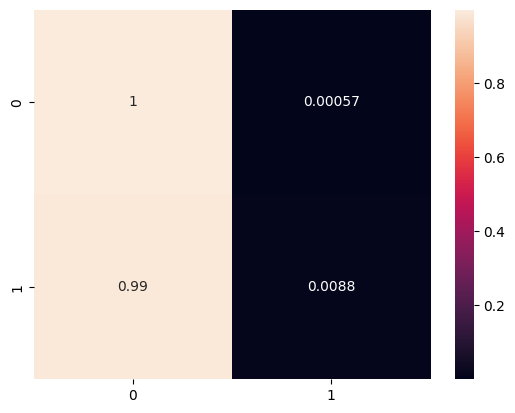

In [211]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True);

In [212]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

np.float64(0.5041030818441321)

In [213]:
from sklearn.metrics import roc_curve

y_pred_prob = log_r.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
pd.DataFrame({"tpr":tpr, "fpr":fpr, "threshold":threshold})

,tpr,fpr,threshold
0,0.000000,0.000000,inf
1,0.000000,0.000064,0.978566
2,0.000000,0.000191,0.972772
3,0.000878,0.000191,0.971012
4,0.000878,0.000319,0.970442
...,...,...,...
2098,0.998244,0.998789,0.003042
2099,0.999122,0.998789,0.003030
2100,0.999122,0.999044,0.001860
2101,1.000000,0.999044,0.001823


Text(0.5, 1.0, 'Curva ROC')

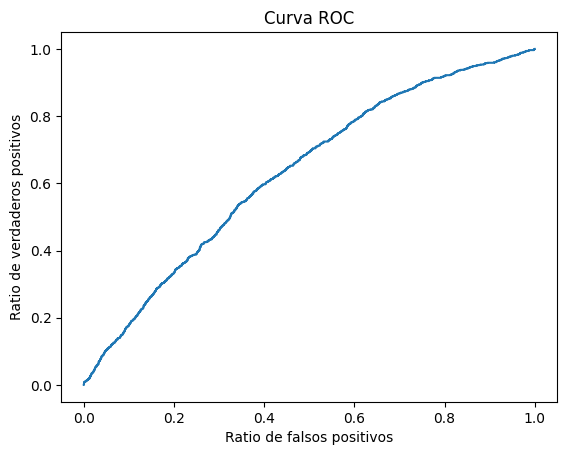

In [214]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

plt.xlabel("Ratio de falsos positivos")
plt.ylabel("Ratio de verdaderos positivos")
plt.title("Curva ROC")

In [215]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])
pd.DataFrame({"prec":prec[1:], "rec":rec[1:], "threshold":thresholds})[80:100]

,prec,rec,threshold
80,0.067753,0.996488,0.010020
81,0.067757,0.996488,0.010082
82,0.067761,0.996488,0.010159
83,0.067765,0.996488,0.010252
84,0.067769,0.996488,0.010261
85,0.067773,0.996488,0.010323
86,0.067777,0.996488,0.010350
87,0.067781,0.996488,0.010383
88,0.067785,0.996488,0.010393
89,0.067790,0.996488,0.010424


Text(0.5, 1.0, 'PR Curve')

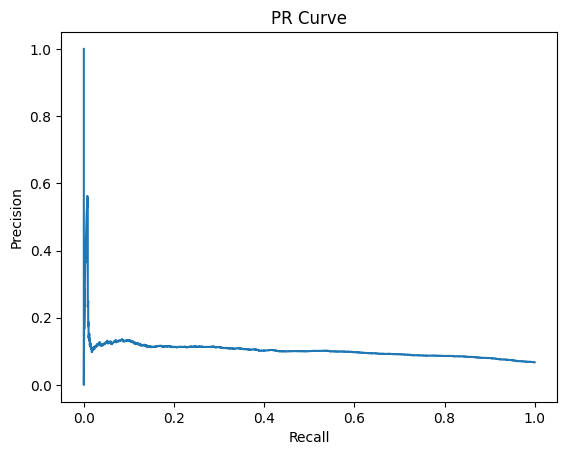

In [216]:
plt.plot(rec, prec)

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.title("PR Curve")

### PREDICT

In [217]:
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    45000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  45000 non-null  float64
 2   Age                                   45000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  45000 non-null  int64  
 4   DebtRatio                             45000 non-null  float64
 5   MonthlyIncome                         36105 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       45000 non-null  int64  
 7   NumberOfTimes90DaysLate               45000 non-null  int64  
 8   NumberRealEstateLoansOrLines          45000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  45000 non-null  int64  
 10  NumberOfDependents                    43840 non-null  float64
dtypes: float64(4), 

In [218]:
dte.isnull().sum()


ID                                         0
RevolvingUtilizationOfUnsecuredLines       0
Age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           8895
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1160
dtype: int64

In [219]:
# median_values = dte.median()
# dte = dte.fillna(median_values)

dte.dropna(inplace=True)


In [220]:
dte.isnull().sum()

ID                                      0
RevolvingUtilizationOfUnsecuredLines    0
Age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [221]:
dte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36105 entries, 1 to 44999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    36105 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  36105 non-null  float64
 2   Age                                   36105 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  36105 non-null  int64  
 4   DebtRatio                             36105 non-null  float64
 5   MonthlyIncome                         36105 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       36105 non-null  int64  
 7   NumberOfTimes90DaysLate               36105 non-null  int64  
 8   NumberRealEstateLoansOrLines          36105 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  36105 non-null  int64  
 10  NumberOfDependents                    36105 non-null  float64
dtypes: float64(4), int64

In [222]:
X_dte = dte

In [223]:
X_dte.shape

(36105, 11)

In [224]:
# scaler = StandardScaler()

# X_dte_scal = scaler.fit_transform(X_dte)

y_dte = log_r.predict(X_dte)

y_dte.shape

(36105,)

In [225]:
y_dte = pd.DataFrame(y_dte, columns=['SeriousDlqin2yrs'])

y_dte.shape

(36105, 1)

In [226]:
y_dte.head()

,SeriousDlqin2yrs
0,0
1,0
2,0
3,0
4,0


In [227]:
y_dte['SeriousDlqin2yrs'].shape

(36105,)

In [228]:
dsol = pd.concat([dte['ID'], y_dte['SeriousDlqin2yrs']], axis=1)

dsol.head()

dsol.to_csv('./data/sol.csv', index=False)

---
---

In [229]:
# dsol = pd.DataFrame()
# dsol2 = pd.DataFrame()

# dsol['ID'] = dte['ID']

# dsol2['SeriousDlqin2yrs'] = y_dte['SeriousDlqin2yrs']

# dsol = pd.concat([dsol, dsol2], axis=1)

# dsol.describe()





# dsol = pd.DataFrame()
# dsol['ID'] = dte['ID']
# dsol['SeriousDlqin2yrs'] = y_dte['SeriousDlqin2yrs']	
# dsol.describe()

In [230]:
dsol.head(10)

,ID,SeriousDlqin2yrs
1,134018.0,0.0
5,118893.0,0.0
7,136337.0,0.0
8,16700.0,0.0
9,57857.0,0.0
11,108865.0,0.0
12,70643.0,0.0
13,63937.0,0.0
14,45630.0,0.0
15,134.0,0.0


In [231]:
dsol.tail(10)

,ID,SeriousDlqin2yrs
36066,NaN,0.0
36069,NaN,0.0
36072,NaN,0.0
36073,NaN,0.0
36083,NaN,0.0
36085,NaN,0.0
36087,NaN,0.0
36089,NaN,0.0
36094,NaN,0.0
36097,NaN,0.0


In [232]:
dte.isnull().sum()

ID                                      0
RevolvingUtilizationOfUnsecuredLines    0
Age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [233]:
import csv
import os
from datetime import datetime

# Get the current date and time
current_datetime = datetime.now()

# Construct the filename
filename = f"submission_dgerwig_{current_datetime.strftime('%Y_%m_%d__%H_%M')}.csv"

# Directory where the file will be saved
directory = "submissions"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Full path for the file
filepath = os.path.join(directory, filename)

dsol.to_csv(filepath, index=False)

print(f"✅ File '{filepath}' generated successfully.")


✅ File 'submissions\submission_dgerwig_2024_07_23__21_53.csv' generated successfully.


In [234]:
dsol

,ID,SeriousDlqin2yrs
1,134018.0,0.0
5,118893.0,0.0
7,136337.0,0.0
8,16700.0,0.0
9,57857.0,0.0
...,...,...
36085,NaN,0.0
36087,NaN,0.0
36089,NaN,0.0
36094,NaN,0.0
